# Contents List 

### 1. Import libraries 
### 2. Personally Identifiable Information (PII)
### 3. Compare customer behavior in different geographic regions
### 4. Exclusion flag for low-activity customers
### 5. Customer profiling variable (age, income, number of dependants)
### 6. Appropriate visualization to show the distribution of profiles
### 7. Aggregate the max, mean, and min variables on a customer-profile
### 8. Customer profiles comparison with regions & departments
### 9. Illustrate results and export them
### 10. Export your final data set

## 1. Import libraries

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/carolinazea/OneDrive/CareerFoundry/Achievement 4- Python/Instacart Basket Analysis'

In [3]:
customer_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods.pkl'))

## 2. Personally Identifiable Information (PII)
### PII is stored in Instacart available data, specificially but not limited to First Name, Last Name, Marital Status,
### Income and Age.
### Based on these factors, this information is considered private and all measures have been executed to
### protect Instacart's members information such as omitting First and Last Name from the dataset. This lessens
### the chance of potential leaks and secures Instacart's member's identification information.

In [4]:
# Drop unecessary columns 

df = customer_ords_prods.drop(columns = ['First Name', 'Last Name'])

## 3. Compare customer behavior in different geographic regions

In [5]:
# Value counts for each US State

df['STATE'].value_counts(dropna= False)

California              630308
Pennsylvania            629833
Rhode Island            621341
Georgia                 620618
Arizona                 619810
North Carolina          618268
Oklahoma                615354
Minnesota               613699
New Mexico              611481
Maine                   610309
Alaska                  610279
Wyoming                 609764
Massachusetts           608964
Arkansas                608035
Mississippi             607362
Texas                   605608
North Dakota            605317
Nevada                  605083
Missouri                604383
Virginia                603563
South Dakota            602744
Kansas                  602396
Louisiana               602384
Alabama                 602310
South Carolina          602049
New York                601409
Washington              601352
Montana                 600639
Michigan                600593
Kentucky                600323
Colorado                599764
Oregon                  599340
Delaware

In [6]:
result = []

for value in df ['STATE']:
    if (value == 'Maine' or value =='New Hampshire' or value =='Vermont' or value =='Massachusetts' or value =='Rhode Island' or value =='Connecticut' or value =='New York' or value =='Pennsylvania' or value =='New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin' or value =='Michigan' or value =='Illinois' or value =='Indiana' or value =='Ohio' or value =='North Dakota' or value =='South Dakota' or value =='Nebraska' or value =='Kansas' or value =='Minnesota' or value =='Iowa' or value =='Missouri'):
        result.append('Midwest')
    elif (value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana'):
        result.append('South')
    elif (value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii'):
        result.append('West')
    else:
        result.append('NaN')

In [7]:
# Create column based on results, called 'Region'

df['Region'] = result

In [8]:
# View valuecount of newly created 'Region' column

df['Region'].value_counts(dropna = False)

South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: Region, dtype: int64

In [9]:
# Recheck columns 

df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_slowest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag', 'median_order',
       'order_frequency_flag', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'Region'],
      dtype='object')

In [10]:
# Question: Determine whether there’s a difference in spending habits between the different U.S. regions

crosstab = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)

In [11]:
crosstab.to_clipboard()

In [12]:
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,149810,7027114
Northeast,101402,5320623
South,196523,10002459
West,147803,7684007


####  Answer:   As far as spending habits, the South was the largest spender followed by the Midwest 
####           and in regards to customer behavior's low spending habits, the south was also a top contendor, this 
####              could mean that Instacart's members mostly reside in the southern regions, regardless of spending habits.

## 4. Exclusion flag for low-activity customers

In [14]:
# Create Low/High Activity Customers if-statements with the loc() function

df.loc[df['order_number'] <5,'Customer_Activity_Flag'] = 'Low Activity Customers'

In [15]:
df.loc[df['order_number'] >= 5,'Customer_Activity_Flag'] = 'High Activity Customers'

In [16]:
# Value count of Low/High Activity Customers 

df['Customer_Activity_Flag'].value_counts(dropna=False)

High Activity Customers    23076100
Low Activity Customers      7553641
Name: Customer_Activity_Flag, dtype: int64

In [17]:
# Low activity customers sample

df_low_activity_customers = df[df.Customer_Activity_Flag == 'Low Activity Customers']

In [18]:
# Value count for low activity customers sample 

df_low_activity_customers['Customer_Activity_Flag'].value_counts(dropna= False)

Low Activity Customers    7553641
Name: Customer_Activity_Flag, dtype: int64

In [19]:
# Export low activity customers sample

df_low_activity_customers.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_low_activity_customers.pkl'))

In [20]:
# Now exclude customers with less than 5 orders from the data 

df = df[df.Customer_Activity_Flag == 'High Activity Customers']

In [21]:
# Value count

df['Customer_Activity_Flag'].value_counts(dropna= False)

High Activity Customers    23076100
Name: Customer_Activity_Flag, dtype: int64

## 5. Customer household profiling variable (age, income, number of dependants)

In [22]:
# # First, find Age/Number of dependants profile using predefined loc() function 

In [23]:
# Young Shopper

df.loc[(df['Age'] >= 18) & (df['Age'] <= 36), 'Shopper Age'] = 'Young Shopper'

In [24]:
# Middle Age Shopper

df.loc[(df['Age'] >= 37) & (df['Age'] <= 55),'Shopper Age'] = 'Middle Age Shopper'

In [25]:
# Older Age Shopper

df.loc[(df ['Age'] >= 56), 'Shopper Age'] = 'Older Age Shopper'

In [26]:
df['Shopper Age'].value_counts(dropna= False)

Older Age Shopper     9321388
Middle Age Shopper    6906309
Young Shopper         6848403
Name: Shopper Age, dtype: int64

#### Based on the above data, most shoppers at Instacart are within the Older Age range (above 56 years old). This could
#### be due to variables including income, family status, or retirement status. 

#### Data Citation for Young, Middle Age, and Older Age Shopper:

#### "A comparison of young, middle-aged, and older adult treatment", Accessed from https://pubmed.ncbi.nlm.nih.gov/11815703/ on July 5, 2021.

In [29]:
# Find economic class profile using the 'Income' variable   

In [30]:
# Low Income Earners 

df.loc[(df['income'] < 40100), 'Income Level'] = 'Low Earners'

In [31]:
# Middle Income Earners

df.loc[(df['income'] >= 40100) & (df['income'] <= 120400), 'Income Level'] = 'Middle Earners'

In [32]:
# High Income Earners

df.loc[(df['income'] > 120400), 'Income Level'] = 'High Earners'

In [33]:
df['Income Level'].value_counts(dropna= False)

Middle Earners    15103729
High Earners       6793589
Low Earners        1178782
Name: Income Level, dtype: int64

#### Based on the available data, shoppers who make more than $40,100 and less than $120,400 are 
#### considered middle income earners where they spend the majority in Instacart's products.

#### Data Citation for Income Levels:

#### "Where Do I Fall in the American Economic Class System?", Accessed from https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system on July 5, 2021.

In [36]:
df.loc[(df['n_dependants'] == 0), 'Size of Household'] = 'No dependants'

In [37]:
df.loc[(df['n_dependants'] >= 1) & (df['n_dependants'] <= 2), 'Size of Household'] = 'Small Size Family'

In [38]:
df.loc[(df['n_dependants'] >= 3), 'Size of Household'] = 'Mid Size Family'

In [39]:
df.loc[(df['n_dependants'] >= 4), 'Size of Household'] = 'Large Size Family'

In [40]:
df['Size of Household'].value_counts(dropna= False)

Small Size Family    11519990
Mid Size Family       5789340
No dependants         5766770
Name: Size of Household, dtype: int64

#### Based on the data, most families that shop via Instacart have less than 2 children. 

#### (Small-Large Size Family data was based on educated guess and not a real source)

In [42]:
# Use query below to display all columns in database

pd.options.display.max_columns = None

In [43]:
# Use query below to display all rows in database

pd.options.display.max_rows = None

In [44]:
# Recheck dataset at some point in data reconfiguration

df.head(20)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_slowest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,Customer_Activity_Flag,Shopper Age,Income Level,Size of Household
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customers,Young Shopper,Middle Earners,Mid Size Family
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customers,Young Shopper,Middle Earners,Mid Size Family
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customers,Young Shopper,Middle Earners,Mid Size Family
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customers,Young Shopper,Middle Earners,Mid Size Family
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customers,Young Shopper,Middle Earners,Mid Size Family
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customers,Young Shopper,Middle Earners,Mid Size Family
15,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,23,19,4.4,Low-range product,Least busy,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customers,Young Shopper,Middle Earners,Mid Size Family
16,3367565,1,6,2,7,19.0,12427,2,1,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customers,Young Shopper,Middle Earners,Mid Size Family
17,550135,1,7,1,9,20.0,12427,3,1,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customers,Young Shopper,Middle Earners,Mid Size Family
18,3108588,1,8,1,14,14.0,12427,1,1,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customers,Young Shopper,Middle Earners,Mid Size Family


In [58]:
# Create customer profile

df_customer_profile = df[['user_id','fam_status', 'Shopper Age', 'Size of Household', 'spending_flag','days_since_prior_order','Customer_Activity_Flag', 'Income Level','Region']]


In [59]:
# Display newly created dataframe 

df_customer_profile.head(50)

,user_id,fam_status,Shopper Age,Size of Household,spending_flag,days_since_prior_order,Customer_Activity_Flag,Income Level,Region
4,1,married,Young Shopper,Mid Size Family,Low spender,28.0,High Activity Customers,Middle Earners,South
5,1,married,Young Shopper,Mid Size Family,Low spender,19.0,High Activity Customers,Middle Earners,South
6,1,married,Young Shopper,Mid Size Family,Low spender,20.0,High Activity Customers,Middle Earners,South
7,1,married,Young Shopper,Mid Size Family,Low spender,14.0,High Activity Customers,Middle Earners,South
8,1,married,Young Shopper,Mid Size Family,Low spender,0.0,High Activity Customers,Middle Earners,South
9,1,married,Young Shopper,Mid Size Family,Low spender,30.0,High Activity Customers,Middle Earners,South
15,1,married,Young Shopper,Mid Size Family,Low spender,28.0,High Activity Customers,Middle Earners,South
16,1,married,Young Shopper,Mid Size Family,Low spender,19.0,High Activity Customers,Middle Earners,South
17,1,married,Young Shopper,Mid Size Family,Low spender,20.0,High Activity Customers,Middle Earners,South
18,1,married,Young Shopper,Mid Size Family,Low spender,14.0,High Activity Customers,Middle Earners,South


## 6. Appropriate visualization to show the distribution of profiles.

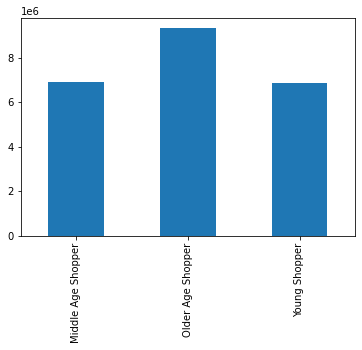

In [51]:
shopper_age_bar = df_customer_profile['Shopper Age'].value_counts().sort_index().plot.bar()

# Older Aged Shoppers group tend to shop more than Middle or Young shoppers

In [52]:
# Save visualization

shopper_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Shopper_Age.png'))

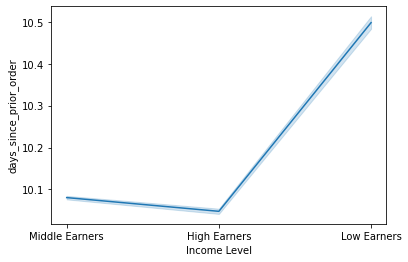

In [60]:
line = sns.lineplot(data = df_customer_profile, x = 'Income Level', y = 'days_since_prior_order')

# High Earners do not wait to re-order Instacart products, whereas Low Earners wait more days to re-order

In [61]:
# Save visualization

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_Level_Region.png'))

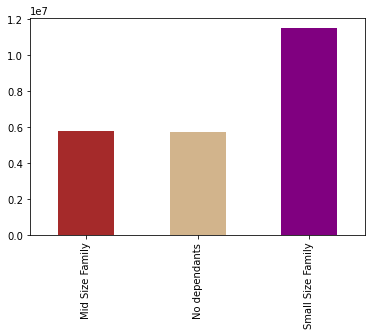

In [62]:
Household_bar = df_customer_profile['Size of Household'].value_counts().sort_index().plot.bar(color =['brown', 'tan', 'purple'])

# Small size families shoppers that have less than 2 children per household tend to shop more through Instacart

In [63]:
# Save visualization

Household_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Size_of_household.png'))

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [64]:
df.groupby('Shopper Age').agg({'days_since_prior_order':['max','min','mean','median']})

# All Instacart shoppers last ordered products within a 30 day period, or 0 days if this a shopper recently signed up 
# and has not ordered as of yet. 

days_since_prior_order                       
                                      max  min       mean median
Shopper Age                                                     
Middle Age Shopper                   30.0  0.0  10.081458    7.0
Older Age Shopper                    30.0  0.0  10.080477    7.0
Young Shopper                        30.0  0.0  10.118840    7.0

In [65]:
df.groupby('Shopper Age').agg({'order_hour_of_day':['max','min','mean','median']})

# All Instacart shoppers have ordered at any time in the day. 

order_hour_of_day                      
                                 max min       mean median
Shopper Age                                               
Middle Age Shopper                23   0  13.381655     13
Older Age Shopper                 23   0  13.364625     13
Young Shopper                     23   0  13.341051     13

In [66]:
df.groupby('Shopper Age').agg({'income':['max','min','mean','median']})

# Older Shoppers are generally spending more money in Instacart.

income                              
                       max    min           mean  median
Shopper Age                                             
Middle Age Shopper  591089  25903  106692.127173  105646
Older Age Shopper   593901  29001  116265.180368  116305
Young Shopper       396364  25911   70831.982766   69294

In [67]:
df.groupby('Region').agg({'income':['max','min','mean','median']})

# The western regions have the highest earners, next to the south.

income                             
              max    min           mean median
Region                                        
Midwest    579397  25903  100900.937300  97669
Northeast  584097  26095  100047.679254  96986
South      591089  25911   99352.796265  96177
West       593901  25941   99660.532533  96881

In [68]:
df.groupby('Income Level').agg({'income':['max','min','mean','median']})

# The lowest earner in Instacart database is $40,099 whereas the highest earner makes $593,901.

income                               
                   max     min           mean  median
Income Level                                         
High Earners    593901  120401  150496.711652  146278
Low Earners      40099   25903   34317.890490   34447
Middle Earners  120400   40100   82285.738978   83587

In [69]:
df.groupby('Income Level').agg({'department_id':['max','min','mean','median']})

# All US Instacart's have the same minimum and maximum departments, so no store containes less items or more. 

department_id                      
                         max min       mean median
Income Level                                      
High Earners              21   1   9.822614      8
Low Earners               21   1  10.905715     12
Middle Earners            21   1   9.897057      8

## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [70]:
# Import departments CSV 

df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [71]:
# Rename column 

df_depts.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [76]:
# Create dataframe that only includes department_id and region columns

df_customer_dept = df[['department_id','Region']]

In [77]:
# Merge department & newly created dataframe with id = 'department_id'

df_merge_customter_depts = df_depts.merge(df_customer_dept, on = 'department_id')

In [80]:
# Check merge was successful

df_merge_customter_depts.head(100)

,department_id,department,Region
0,1,frozen,South
1,1,frozen,South
2,1,frozen,South
3,1,frozen,South
4,1,frozen,South
5,1,frozen,South
6,1,frozen,South
7,1,frozen,South
8,1,frozen,South
9,1,frozen,South


In [82]:
# Create crosstab that displays department and regions as per question 

crosstab = pd.crosstab(df_merge_customter_depts['department'],df_merge_customter_depts['Region'], dropna = False)

In [83]:
# Display results

crosstab

Region,Midwest,Northeast,South,West
department,,,,
alcohol,24716,17662,34393,26300
babies,73782,56811,106945,79588
bakery,194314,149407,275987,215470
beverages,445783,347934,642803,487992
breakfast,115003,87325,163888,128633
bulk,6143,4299,8632,6930
canned goods,174135,131049,248589,190976
dairy eggs,908533,689027,1296498,998743
deli,173001,131923,245331,189788


#### Based on the data above, the crosstab displays the total number of prodcuts in Instacart's department within the four different US 
#### regions. For example, alcohol, pet supplies, beverages, dairy eggs, pantry products are most purchased in the South. Most 
#### of the Instacart's database tells us that the southern regions are more likely to purchase Instacart's products. 

## 9. Produce suitable charts to illustrate your results and export them in your project folder.

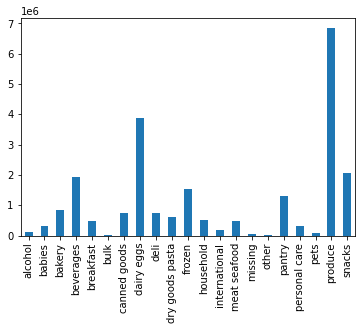

In [86]:
# Bar chart displaying popular products within the department column

crosstab_bar = df_merge_customter_depts['department'].value_counts().sort_index().plot.bar()

In [89]:
# Save bar chart 

crosstab_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_bar.png'))

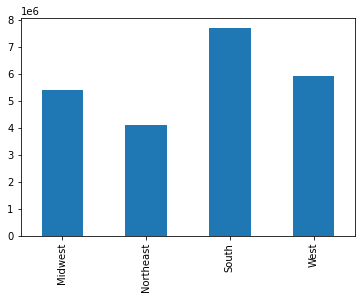

In [88]:
# Bar chart displaying region based on total count of users in region

crosstab_region_bar = df_merge_customter_depts['Region'].value_counts().sort_index().plot.bar()

In [90]:
# Save bar chart

crosstab_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_bar.png'))

## 10. Tidy up your script, export your final data set, and save your notebook.

In [91]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_final_dataset.pkl'))

In [92]:
df_customer_profile.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_profile.pkl'))

In [93]:
df_merge_customter_depts.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'regions_departments_data.pkl'))